
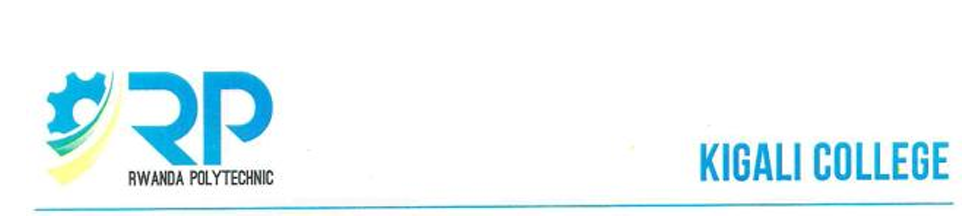


MODULE CODE & TITLE: GENML801- MACHINE LEARNING

RQF LEVEL: 8

DEPARTMENT: ELECTRICAL AND ELECTRONICS ENGINEERING (EEE)

PROGRAM: ELECTRONICS AND TELECOMMUNICATION TECHNOLOGY (ETT)

MODULE LEADER: MUKAMANA Florentine

## REG:25RP18365
### NAMES:HAKORIMANA PHILBERT

###### ACADEMIC YEAR: 2025-2026

##### Date: 20th September 2025
##### Submission deadline: 26th September 2025
##### Submission email: muflorentine3@gmail.com

The objective of this assignment is to gain hands-on experience in solving a real-world problem
by applying Exploratory Data Analysis (EDA), Feature Engineering, and deploying a Machine
Learning model. Everyone is required to choose an important project and apply EDA and Feature
Engineeing technique

### PROJECT TITLE: Electricity Load Forecasting Using Random Forest on Smart Meter Data Across Rwandan Cities

#### This notebook demonstrates Predict electricity load based on historical consumption, time-related features (hour, weekday, season), and city identifiers. 
#### Analyze feature importance to understand key drivers of electricity consumption
#### Compare load forecasting performance across different cities.
#### Provide a scalable solution that can be extended to other regions or integrated into utility forecasting systems.

### 1. Define a Problem Statement

This project aims to develop a Random Forest-based machine learning model to accurately forecast short-term electricity load using high-resolution smart meter data from various cities in Rwanda. The goal is to help utility providers better manage energy demand by capturing complex consumption patterns across time and regions. By analyzing historical usage and contextual factors (like time of day and city), the model will support more efficient energy planning, improve grid reliability, and enable smarter decision-making in Rwanda's evolving power sector.

1.Unpredictable Demand Patterns
Electricity consumption varies significantly by hour, day, season, and region, making it difficult for utility providers to accurately forecast demand using traditional methods.
2. Lack of Real-Time Forecasting Tools
Most energy providers in Rwanda lack data-driven, real-time forecasting tools, leading to inefficiencies in grid management and increased risk of outages or overproduction.
3. Regional Differences Are Ignored
Cities across Rwanda (e.g., Musanze  vs. Kigali) have different consumption behaviors due to climate, population, and socio-economic factors, but current systems often use generalized models that ignore these variations.
4. Wasted Resources and Higher Costs
Inaccurate load forecasting results in overloading or underutilization of infrastructure, causing financial losses, wasted energy, and poor decision-making in energy distribution.

### 2. Choose a Dataset
• Select an open dataset (Kaggle, UCI Repository, or other sources) which is relevant to your problem.

• Provide a short description of the dataset (features, size, and target variable).

Univariate Analysis from this link bellow 

https://archive.ics.uci.edu/dataset/1158/high-resolution+load+dataset+from+smart+meters+across+various+cities+in+morocco

It is Univariate analysis because i'm gonna to applies those bellow:
Load (kWh): Analyze distribution (mean, median, outliers).
Hour of Day, Day of Week, Month: Explore usage patterns across time.
City: See the number of observations per city.
Temperature / Weather (if available): Understand environmental factors.

#### Necessary Libraries are:

In [154]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import os

# Example: load one scenario (user must replace with actual path to LeakDB files)
# For demo purposes, we will simulate a small sample dataframe similar to LeakDB outputs

In [155]:
FILE_PATH = r"C:/Users\Philber_/Documents/PHIL/Model saving/Data_Rwanda.xlsx"
ZONES = ["zone1", "zone2", "zone3", "zone4", "zone5"]
LAGS = 1                                                 # how many past values to use
OUTPUT_DIR = "rf_results"
os.makedirs(OUTPUT_DIR, exist_ok=True)    # Ensure DateTime is parsed correctly


In [156]:
xls = pd.ExcelFile(FILE_PATH)
sheets = xls.sheet_names

In [157]:
metrics = []

In [158]:
for city in sheets:
    print(f"\n=== Processing {city} ===")
    df = pd.read_excel(FILE_PATH, sheet_name=city)


=== Processing Kigali ===

=== Processing Musanze ===


In [159]:
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

In [160]:
df = df.sort_values('DateTime').reset_index(drop=True)

In [161]:
  for zone in ZONES:
        if zone not in df.columns:
            continue

In [162]:
print(f"  -> Training for {zone}")

  -> Training for zone5


In [163]:
 if zone not in df.columns:
    print(f" Skipping {zone} — not found in {city}")
  

In [164]:
   df_clean = df.dropna().copy()

In [165]:
expected_cols = [f"{zone}_lag_{i}" for i in range(1, LAGS+1)]
print("Checking lag columns:", expected_cols)
print("Available columns:", df_clean.columns.tolist())

Checking lag columns: ['zone5_lag_1']
Available columns: ['DateTime', 'zone1', 'zone2', 'zone3', 'zone4', 'zone5']


In [166]:
lag_cols = [f"{zone}_lag_{i}" for i in range(1, LAGS+1)]
       

In [167]:
if df_clean.empty:
    print(f"⚠️ No data left for {city}-{zone} after cleaning, skipping...")

In [168]:
if not all(col in df_clean.columns for col in lag_cols):
    print(f"⚠️ Missing lag columns for {city}-{zone}, skipping...")

⚠️ Missing lag columns for Musanze-zone5, skipping...


In [169]:
for zone in ZONES:
    if zone not in df.columns:
        print(f"⚠️ {zone} not found in {city}, skipping...")
        

        

In [170]:
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

In [171]:
lag_cols = [f"{zone}_lag_{i}" for i in range(1, LAGS+1)]

In [172]:
missing = [col for col in lag_cols if col not in df_clean.columns]
if missing:
    print(f"⚠️ Skipping {city}-{zone}, missing lag cols: {missing}")
    

⚠️ Skipping Musanze-zone5, missing lag cols: ['zone5_lag_1']


In [173]:
df.columns = df.columns.str.strip().str.lower() 

In [174]:
ZONES = [z.lower() for z in ZONES]

In [175]:
if zone not in df.columns:
    print(f"⚠️ {zone} not found in {city}, skipping...")

In [176]:
df.columns = df.columns.str.strip().str.lower()   # " Zone5 " → "zone5"
ZONES = [z.lower() for z in ZONES]

In [177]:
   df.columns = df.columns.str.strip().str.lower()

In [178]:
 if "datetime" not in df.columns:
        print(f"❌ Skipping {city}: no 'datetime' column")

In [179]:
  df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

In [180]:
zones = [c for c in df.columns if c != "datetime"]

In [181]:
 for zone in zones:
        print(f"  🔹 Zone: {zone}")

  🔹 Zone: zone1
  🔹 Zone: zone2
  🔹 Zone: zone3
  🔹 Zone: zone4
  🔹 Zone: zone5


In [182]:
for lag in range(1, LAGS + 1):
            df[f"{zone}_lag_{lag}"] = df[zone].shift(lag)

In [183]:
lag_cols = [f"{zone}_lag_{i}" for i in range(1, LAGS + 1)]

In [184]:
 df_clean = df.dropna(subset=lag_cols + [zone]).copy()
 if df_clean.empty:print(f"Skipping {city}-{zone}: insufficient data")

In [185]:
X = df_clean[lag_cols]
y = df_clean[zone]
        

In [186]:
dates = df_clean["datetime"]

In [187]:
 df_clean = df.dropna(subset=lag_cols + [zone]).copy()

In [188]:
if df_clean.shape[0] < 20:  # at least 20 rows for train/test
    print(f"    ❌ Skipping {city}-{zone}: not enough data after cleaning")

In [189]:
X = df_clean[lag_cols]
y = df_clean[zone]

In [190]:
dates = df_clean["datetime"]

In [191]:
X = df_clean[lag_cols]
y = df_clean[zone]
        

In [192]:
dates = df_clean["datetime"]

In [193]:
df_clean = df.dropna(subset=lag_cols + [zone]).copy()

In [194]:
if df_clean.shape[0] < 10:
    print(f"Skipping {city}-{zone}: not enough data ({df_clean.shape[0]} rows)")

In [195]:
X = df_clean[lag_cols]
y = df_clean[zone]


In [196]:
dates = df_clean["datetime"]

In [197]:
split_idx = int(len(df_clean) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
dates_train, dates_test = dates.iloc[:split_idx], dates.iloc[split_idx:]

In [198]:
if X_train.empty or y_train.empty:
    print(f"Skipping {city}-{zone}: training data is empty")

In [199]:
if X_train.isnull().any().any() or y_train.isnull().any():
    print(f"Skipping {city}-{zone}: NaN values in training data")

In [200]:
print(f"    🔍 Shape of X_train: {X_train.shape}")
print(f"    🔍 Shape of y_train: {y_train.shape}")
print(f"    🔍 Any NaN in X_train? {X_train.isnull().any().any()}")
print(f"    🔍 Any NaN in y_train? {y_train.isnull().any()}")
print(f"    🔍 First rows of X_train:\n{X_train.head()}")
print(f"    🔍 First rows of y_train:\n{y_train.head()}")

    🔍 Shape of X_train: (71111, 1)
    🔍 Shape of y_train: (71111,)
    🔍 Any NaN in X_train? False
    🔍 Any NaN in y_train? False
    🔍 First rows of X_train:
   zone5_lag_1
1    17.098484
2    16.974799
3    16.140766
4    15.959826
5    16.633660
    🔍 First rows of y_train:
1    16.974799
2    16.140766
3    15.959826
4    16.633660
5    18.165625
Name: zone5, dtype: float64


In [201]:
if len(X) < 10:  # not enough samples
    print(f"Skipping {zone} — not enough data after creating lags")

In [202]:
df_lags = df.shift(range(1, LAGS+1), axis=0)  # creates lag features
df_lags = df_lags[LAGS:]

In [203]:
zone = "zone5"
LAGS = 3

In [204]:
lag_cols = [f"{zone}_lag_{i}" for i in range(1, LAGS+1)]
for i in range(1, LAGS+1):df_clean[f"{zone}_lag_{i}"] = df_clean[zone].shift(i)

In [205]:
df_lags = df_clean.dropna().copy()

In [206]:
X = df_lags[lag_cols]
y = df_lags[zone]


In [207]:
print(df_lags.shape)
print(df_lags.head(10))

(88886, 9)
              datetime       zone1       zone2       zone3      zone4  \
4  2022-09-14 17:50:00  139.193310  207.049801  196.622955  90.477206   
5  2022-09-14 18:00:00  143.384327  208.028536  193.985900  90.105540   
6  2022-09-14 18:10:00  142.315061  211.973744  196.739154  92.175527   
7  2022-09-14 18:20:00  146.111105  212.709064  196.453273  93.567016   
8  2022-09-14 18:30:00  146.231651  215.200669  200.823014  92.515440   
9  2022-09-14 18:40:00  148.091463  212.282930  195.947916  91.586656   
10 2022-09-14 18:50:00  150.004142  213.613013  197.417869  95.065210   
11 2022-09-14 19:00:00  142.187178  204.416089  199.011404  95.872588   
12 2022-09-14 19:10:00  141.226593  204.770942  195.213896  95.713426   
13 2022-09-14 19:20:00  148.895141  211.295175  196.402719  96.205662   

        zone5  zone5_lag_1  zone5_lag_2  zone5_lag_3  
4   16.633660    15.959826    16.140766    16.974799  
5   18.165625    16.633660    15.959826    16.140766  
6   18.604667    18.

In [208]:
lag_cols = [col for col in df_lags.columns if "lag" in col]

In [209]:
if df_lags.empty:
    raise ValueError("⚠️ df_lags is empty after lag creation. Check your data size.")

In [210]:
X = df_lags[lag_cols].copy()
y = df_lags[zone].copy()

In [211]:
date_col = [col for col in df_lags.columns if "date" in col.lower()]
if not date_col:raise KeyError("⚠️ No datetime column found in df_lags")
dates = df_lags[date_col[0]]

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
if len(X) == 0 or len(y) == 0:raise ValueError("⚠️ X or y is empty. Check lag creation and dropna() step.")

In [214]:
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, dates, test_size=0.2, shuffle=False
)

In [215]:
print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

Train size: (71108, 3) (71108,)
Test size: (17778, 3) (17778,)


In [216]:
from sklearn.ensemble import RandomForestRegressor

In [217]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [218]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [219]:
y_pred = model.predict(X_test)

In [220]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [221]:
print(f"📊 MAE: {mae:.2f}")
print(f"📊 RMSE: {rmse:.2f}")

📊 MAE: 0.65
📊 RMSE: 1.03


In [222]:
import matplotlib.pyplot as plt

In [223]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

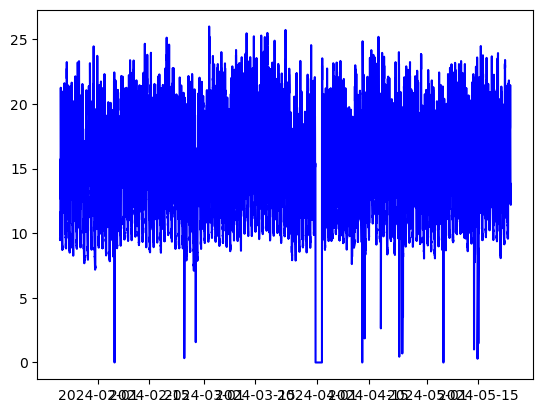

In [224]:
plt.plot(dates_test, y_test, label="Actual Load", color="blue")

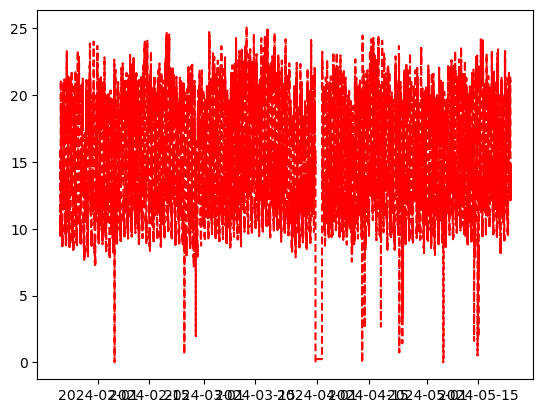

In [225]:
plt.plot(dates_test, y_pred, label="Predicted Load", color="red", linestyle="--")


## 3. Exploratory Data Analysis (EDA)
We explore the distribution of features, check correlations, and visualize relationships.
Types of EDA applied:

Univariate: histograms, boxplots

Bivariate: scatter plots, bar charts

Multivariate: pair plots, correlation matrix

Explore missing values, outliers, and anomalies


In [226]:
print(df.columns)

Index(['datetime', 'zone1', 'zone2', 'zone3', 'zone4', 'zone5', 'zone5_lag_1'], dtype='object')


In [227]:
df.columns = df.columns.str.strip().str.lower()   # normalize column names
print(df.columns)

Index(['datetime', 'zone1', 'zone2', 'zone3', 'zone4', 'zone5', 'zone5_lag_1'], dtype='object')


In [228]:
print(df['datetime'].head())

0   2022-09-14 17:10:00
1   2022-09-14 17:20:00
2   2022-09-14 17:30:00
3   2022-09-14 17:40:00
4   2022-09-14 17:50:00
Name: datetime, dtype: datetime64[ns]


In [229]:
print(df['datetime'].dtype)

datetime64[ns]


In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
datetime_col = [c for c in df.columns if "date" in c.lower()][0]

In [232]:
df[datetime_col] = pd.to_datetime(df[datetime_col], errors="coerce")

In [233]:
df["Date"] = df[datetime_col].dt.date
df["Hour"] = df[datetime_col].dt.hour

In [234]:
zones = [col for col in df.columns if col not in [datetime_col, "Date", "Hour"]]

In [235]:
zone_usage = df.groupby(["Date", "Hour"])[zones].mean().reset_index()

In [236]:
print(zone_usage.head()) 

         Date  Hour       zone1       zone2       zone3       zone4  \
0  2022-09-14    17  136.694225  206.733758  196.318711   89.557562   
1  2022-09-14    18  146.022958  212.301326  196.894521   92.502565   
2  2022-09-14    19  145.112993  210.732959  199.703198   96.696602   
3  2022-09-14    20  142.152043  214.142681  208.186680  100.509654   
4  2022-09-14    21  144.787942  201.856280  200.416190   97.270302   

       zone5  zone5_lag_1  
0  16.561507    16.543469  
1  18.786657    18.402300  
2  17.991265    18.287258  
3  15.820143    16.394028  
4  13.923125    13.867312  


In [237]:
zone = zones[0]

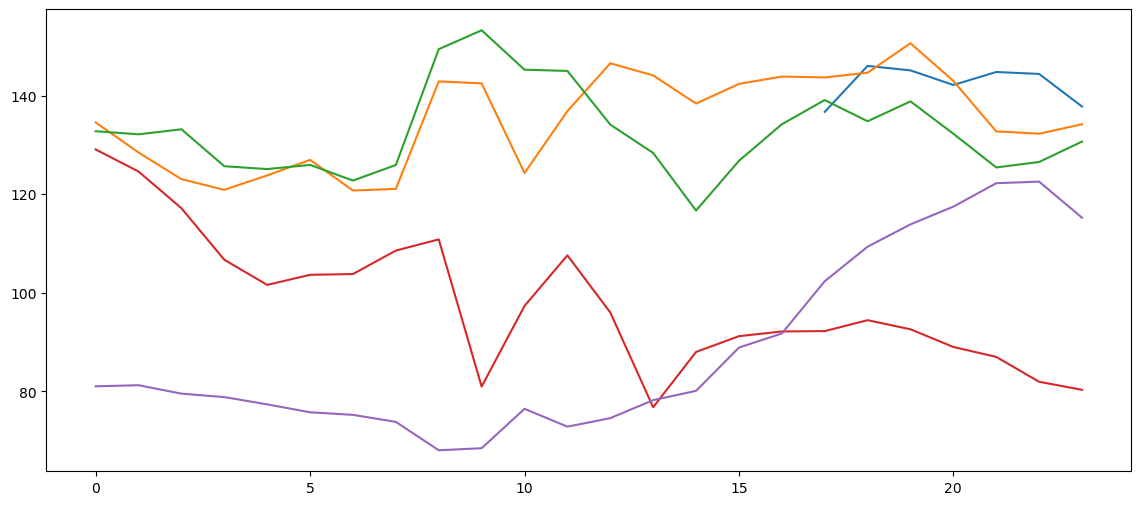

In [238]:
plt.figure(figsize=(14,6))
for d in zone_usage["Date"].unique()[:5]:   # only first 5 days for clarity
    subset = zone_usage[zone_usage["Date"] == d]
    plt.plot(subset["Hour"], subset[zone], label=str(d))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


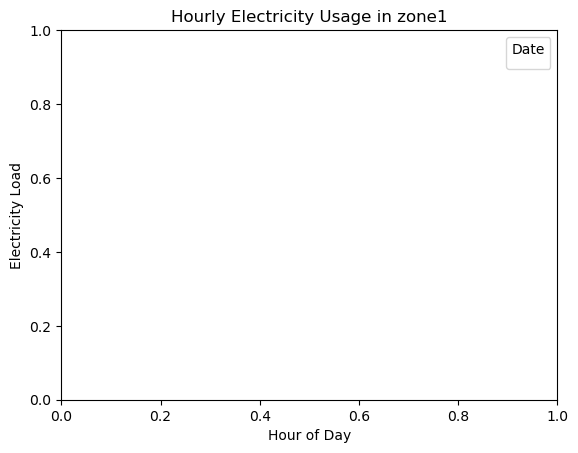

In [239]:
plt.xlabel("Hour of Day")
plt.ylabel("Electricity Load")
plt.title(f"Hourly Electricity Usage in {zone}")
plt.legend(title="Date")
plt.show()

In [240]:
pivot = zone_usage.pivot(index="Hour", columns="Date", values=zone)

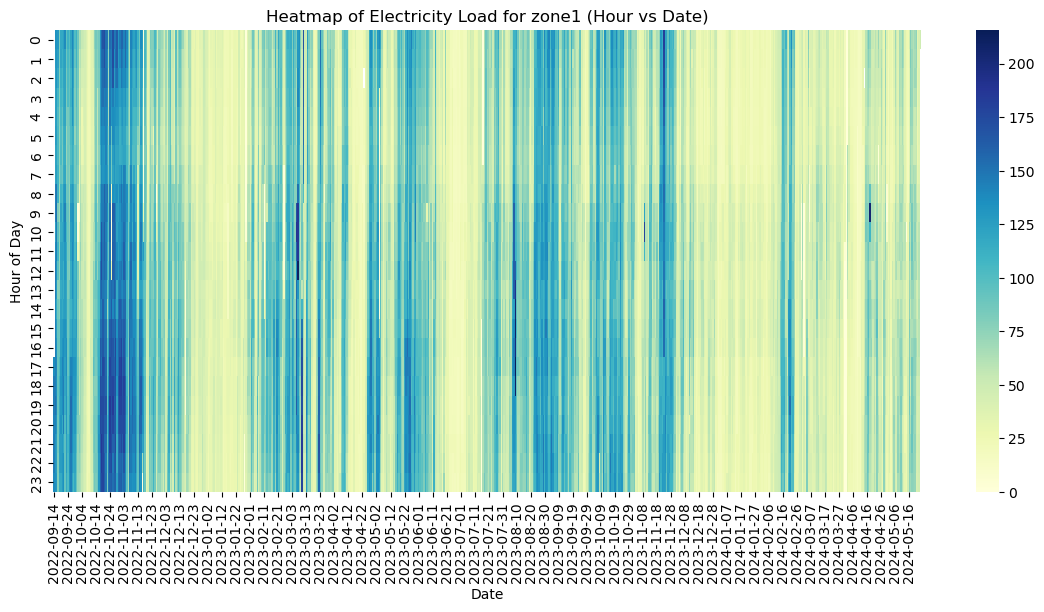

In [241]:
plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title(f"Heatmap of Electricity Load for {zone} (Hour vs Date)")
plt.ylabel("Hour of Day")
plt.xlabel("Date")
plt.show()

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                  ### LET CHECK ZONE PER ZONE 

In [243]:
datetime_col = [c for c in df.columns if "date" in c.lower()][0]

In [244]:
df[datetime_col] = pd.to_datetime(df[datetime_col], errors="coerce")

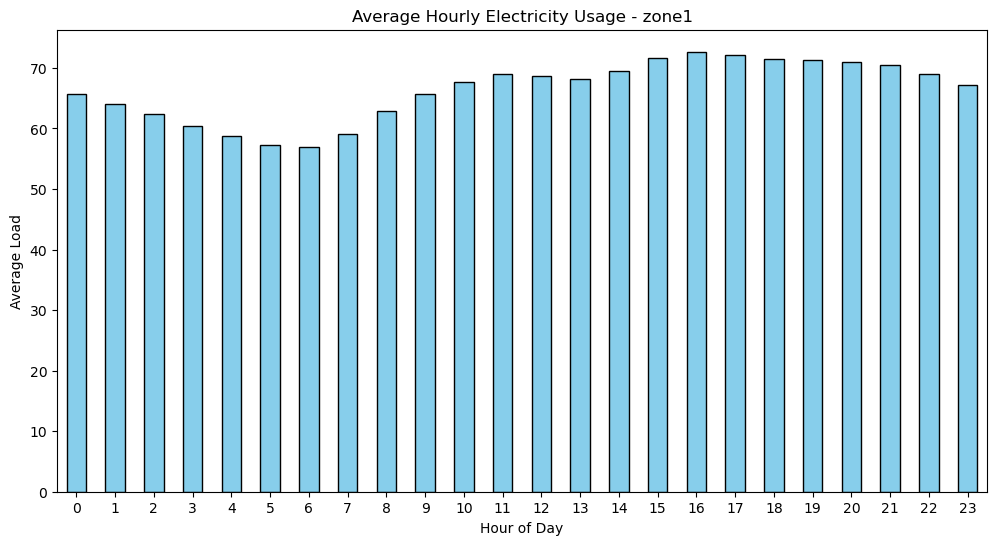

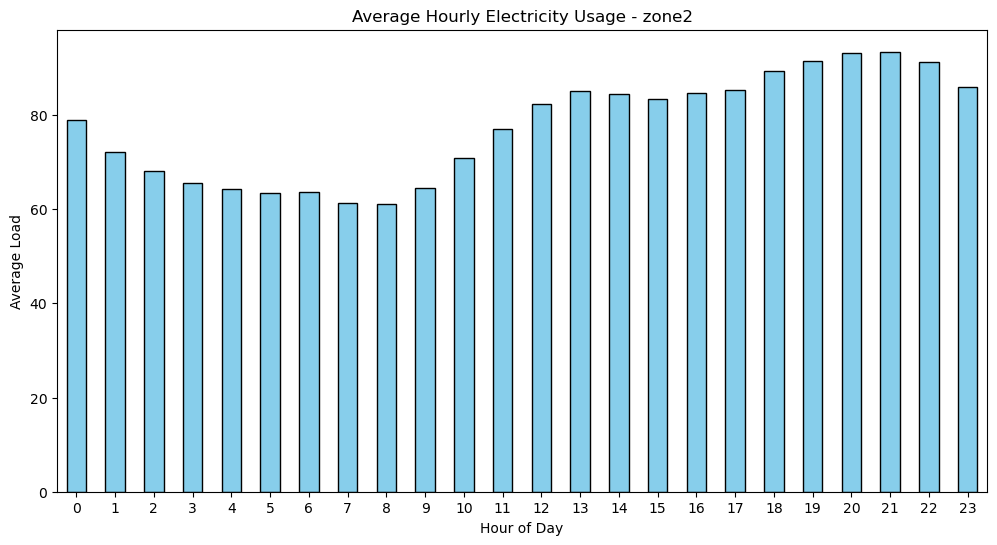

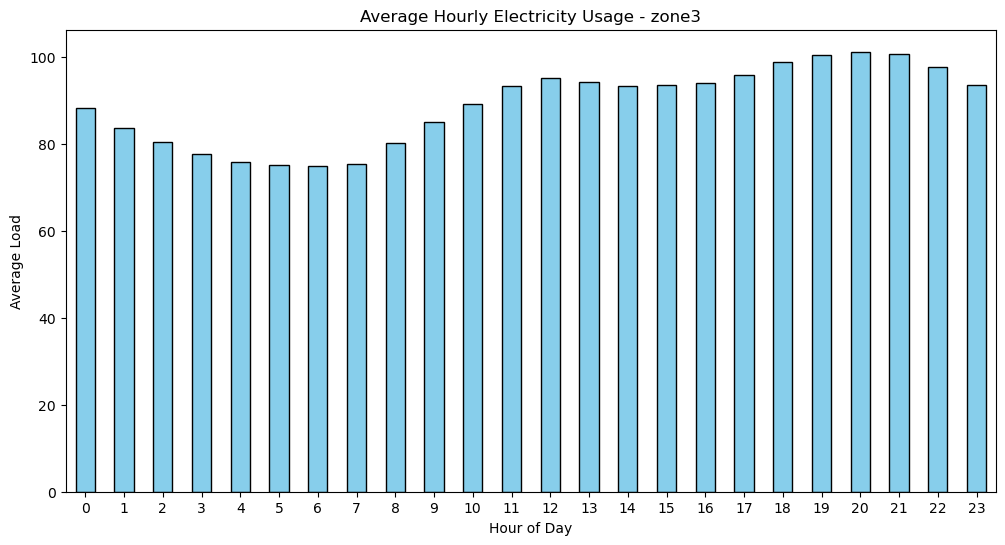

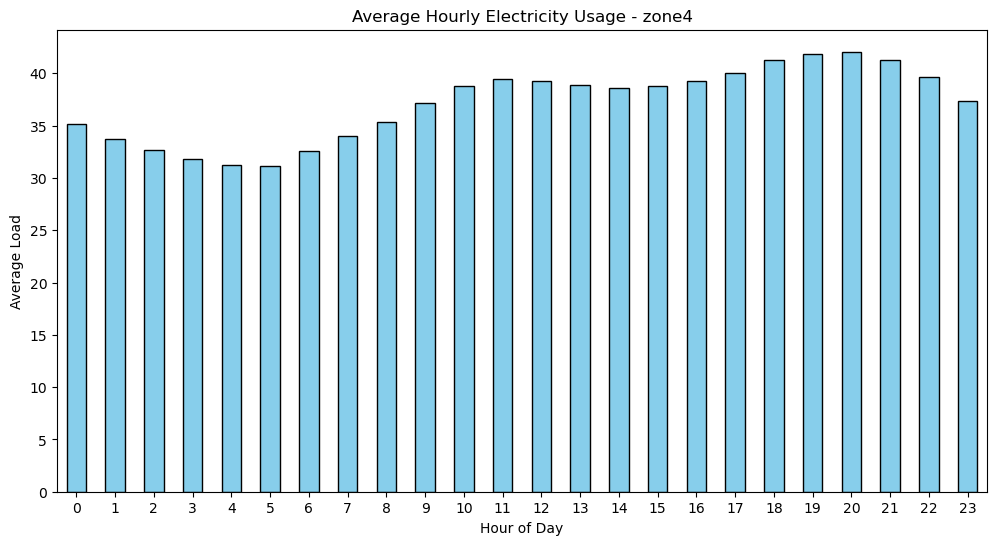

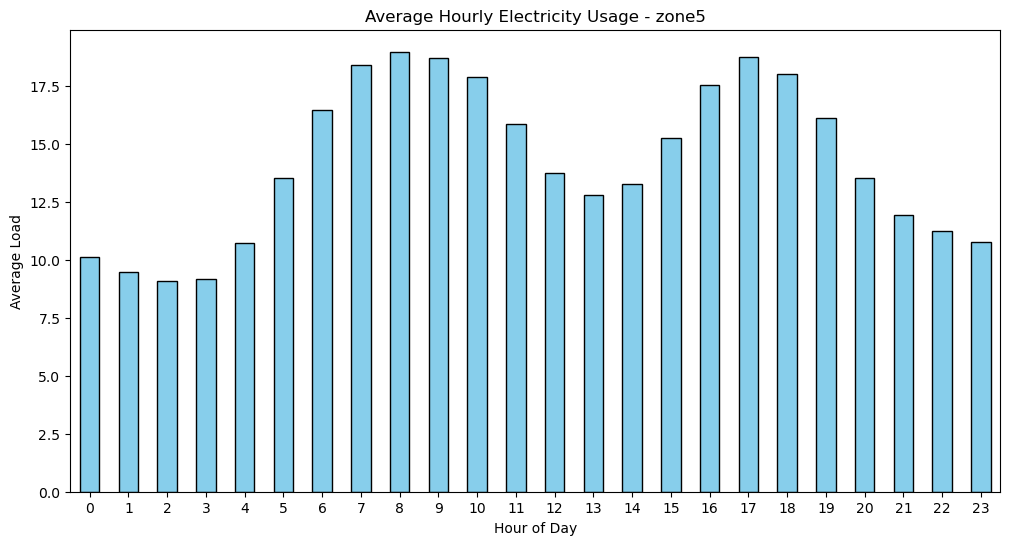

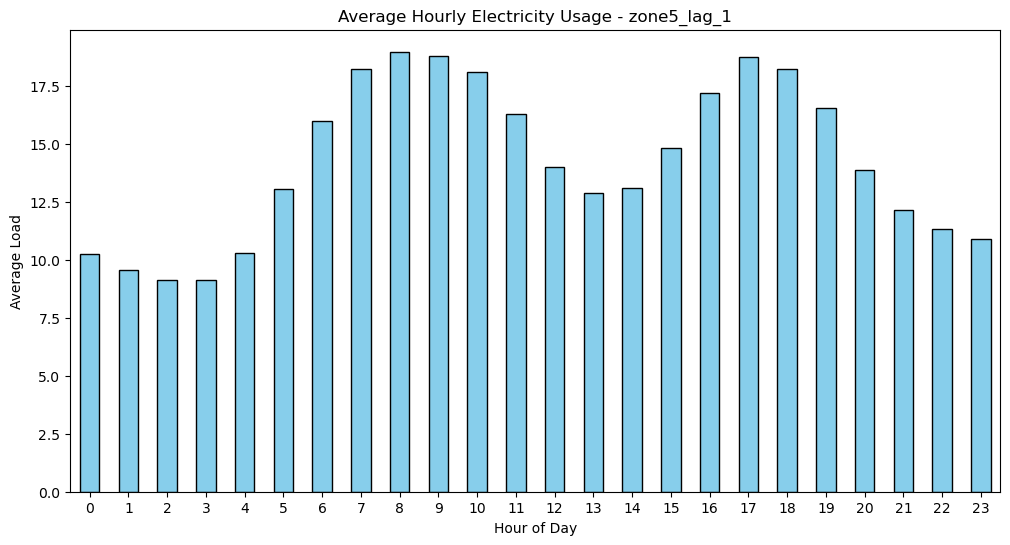

In [245]:
for zone in zones:
    plt.figure(figsize=(12,6))
    avg_by_hour = df.groupby("Hour")[zone].mean()
    avg_by_hour.plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title(f"Average Hourly Electricity Usage - {zone}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Average Load")
    plt.xticks(rotation=0)
    plt.show()

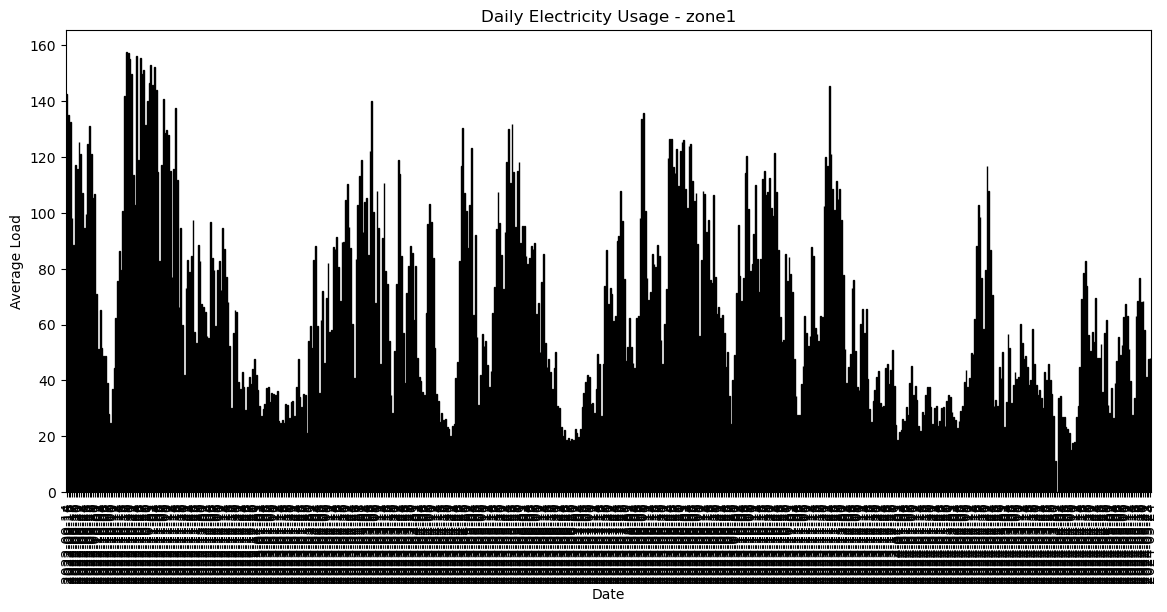

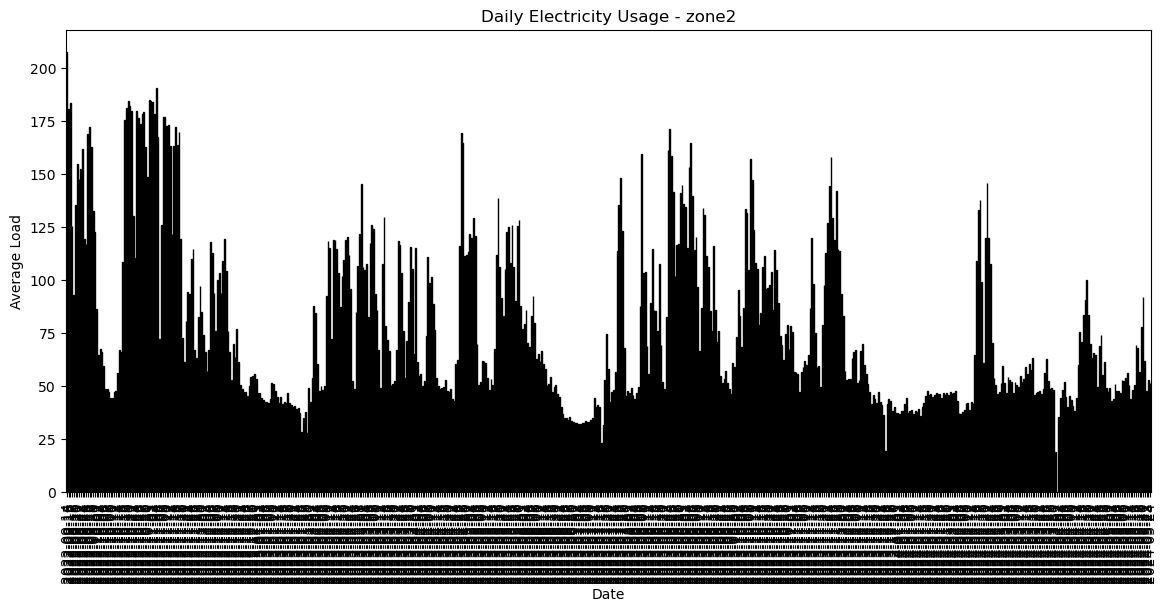

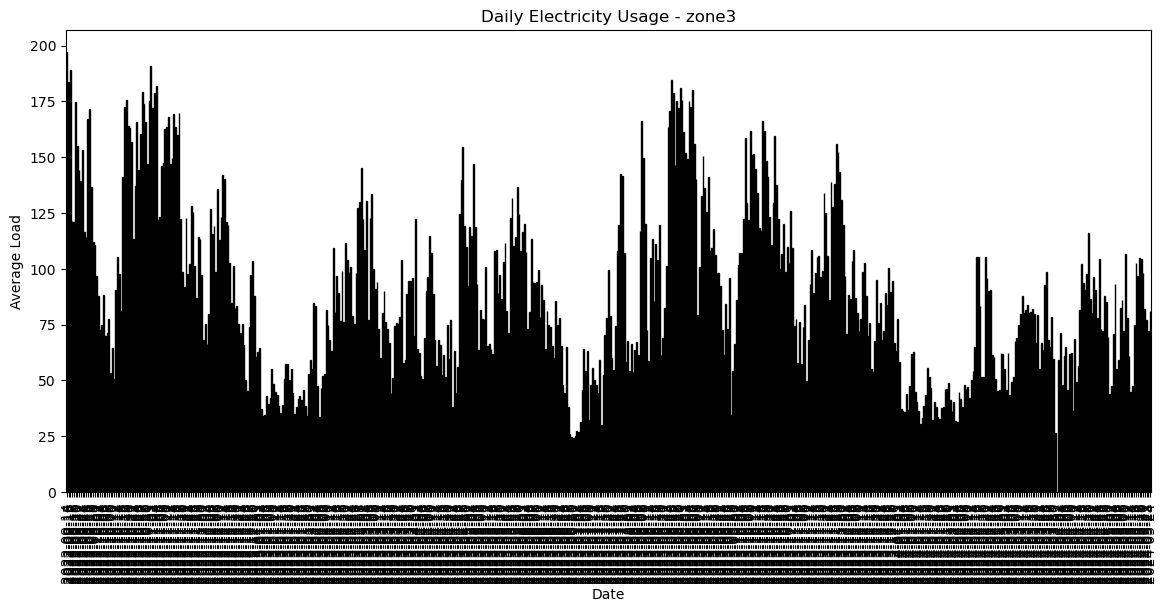

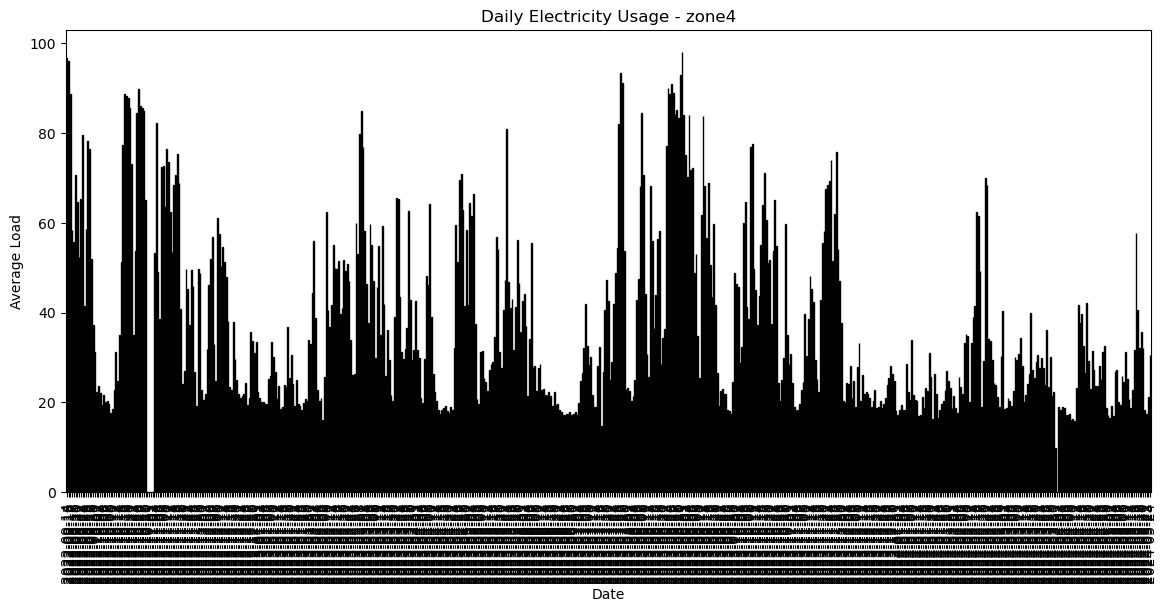

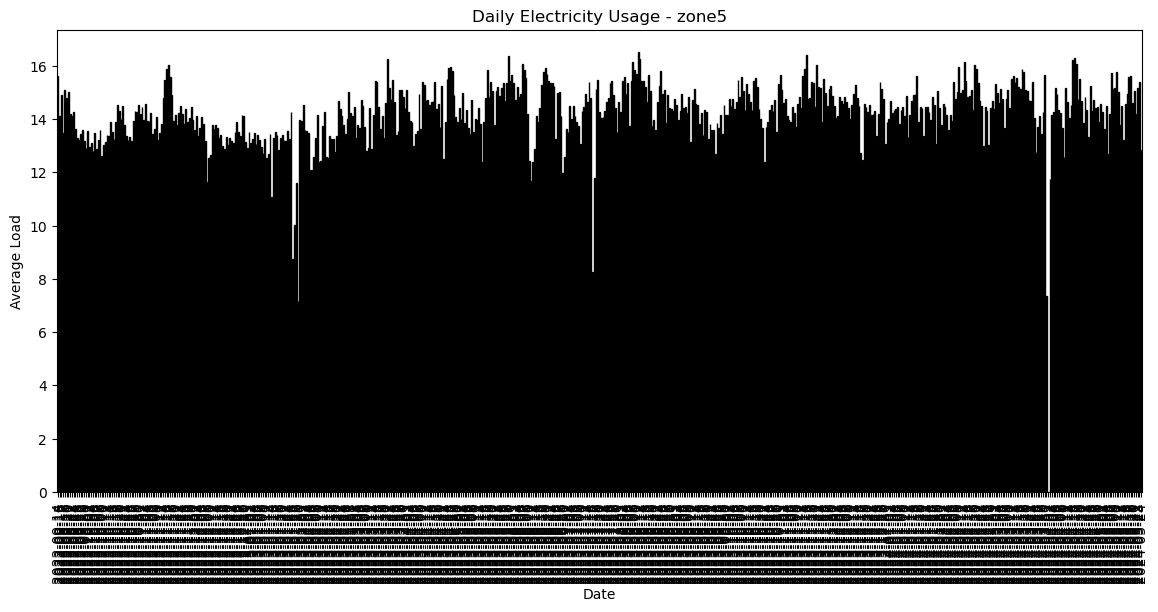

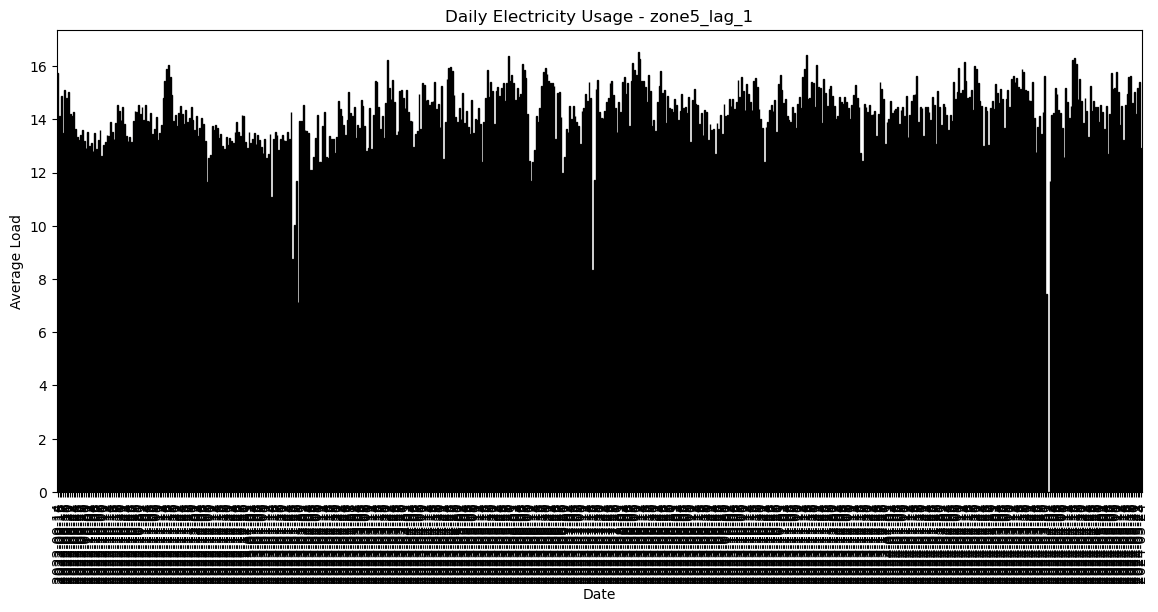

In [246]:
for zone in zones:
    plt.figure(figsize=(14,6))
    avg_by_date = df.groupby("Date")[zone].mean()
    avg_by_date.plot(kind="bar", color="orange", edgecolor="black")
    
    plt.title(f"Daily Electricity Usage - {zone}")
    plt.xlabel("Date")
    plt.ylabel("Average Load")
    plt.xticks(rotation=90)
    plt.show()

In [247]:
avg_hour_city = df.groupby("Hour")[zones].mean()    # ELECTRICIY USAGE BASED ON CITIES 

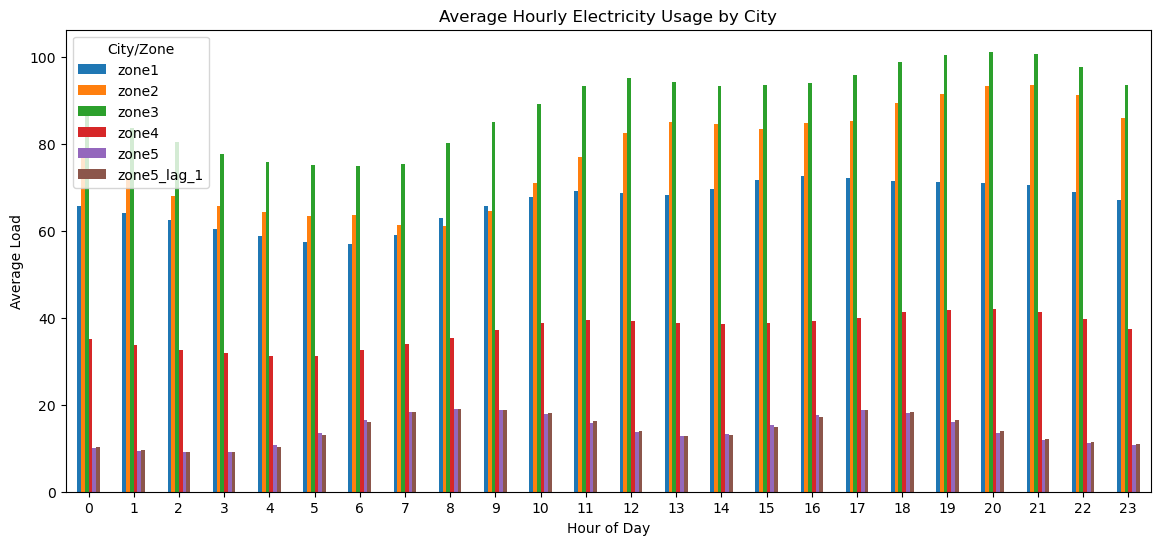

In [248]:
avg_hour_city.plot(kind="bar", figsize=(14,6))
plt.title("Average Hourly Electricity Usage by City")
plt.xlabel("Hour of Day")
plt.ylabel("Average Load")
plt.legend(title="City/Zone")
plt.xticks(rotation=0)
plt.show()

In [249]:
avg_day_city = df.groupby("Date")[zones].mean()

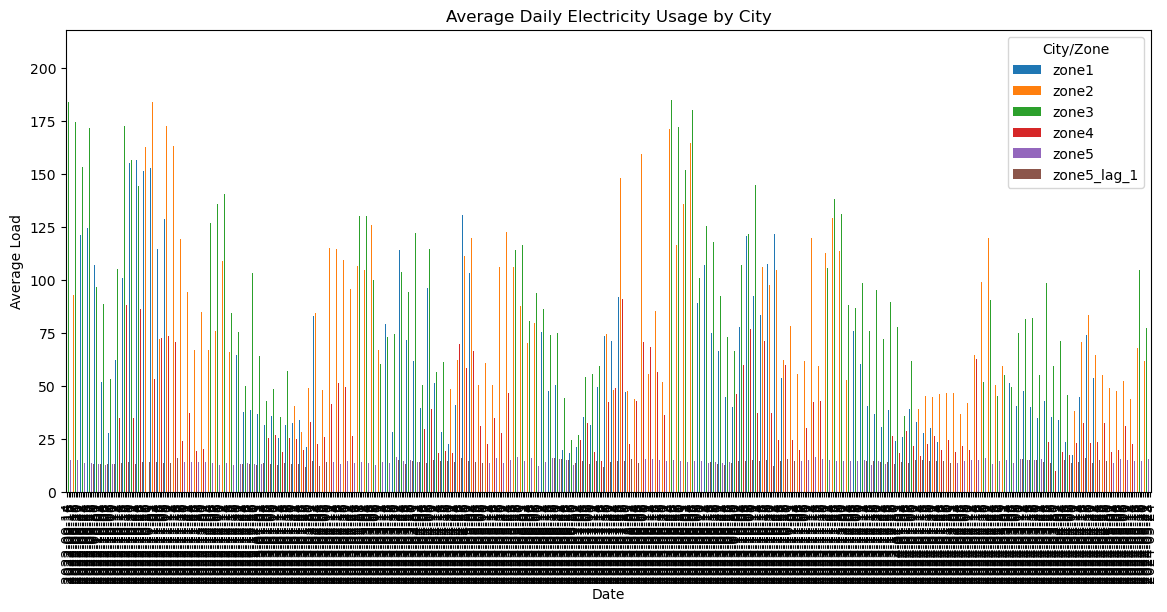

In [250]:
avg_day_city.plot(kind="bar", figsize=(14,6))
plt.title("Average Daily Electricity Usage by City")
plt.xlabel("Date")
plt.ylabel("Average Load")
plt.legend(title="City/Zone")
plt.xticks(rotation=90)
plt.show()

In [251]:
avg_city = df[zones].mean()

avg_city.plot(kind="bar", figsize=(8,6), color="teal", edgecolor="black")
plt.title("Overall Average Electricity Usage by City")
plt.xlabel("City/Zone")
plt.ylabel("Average Load")
plt.xticks(rotation=45)
plt.show()

## saving modol

In [252]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


In [253]:
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [254]:
model = RandomForestRegressor()

In [255]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [283]:
joblib.dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [284]:
loaded_model = joblib.load('random_forest_model.joblib')


## 4. Feature Engineering
We create new features and handle scaling/transformations if needed.
Time-based Features:Electricity usage strongly depends on time (daily, weekly, seasonal).
Lag Features (Past Loads):Random Forest does not know sequence order → we must create lag variables (previous values).
Rolling Statistics (Trends & Seasonality):Capture short-term averages (moving windows).
Inter-zone Features:Sometimes cities are correlated (e.g., Kigali load influences Huye).
We can use other cities’ loads as features.
Target Variable:For each zone (city), the target (y) is the next-hour electricity load.
Final Dataset:Drop rows with NaN (from lag/rolling).


In [258]:
print(df['datetime'].head())


0   2022-09-14 17:10:00
1   2022-09-14 17:20:00
2   2022-09-14 17:30:00
3   2022-09-14 17:40:00
4   2022-09-14 17:50:00
Name: datetime, dtype: datetime64[ns]


In [259]:
print(df.columns)

Index(['datetime', 'zone1', 'zone2', 'zone3', 'zone4', 'zone5', 'zone5_lag_1',
       'Date', 'Hour'],
      dtype='object')


In [260]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [261]:
datetime_col = [c for c in df.columns if "date" in c.lower()][0]

In [262]:
df[datetime_col] = pd.to_datetime(df[datetime_col], errors="coerce")

In [263]:

print("Datetime column used:", datetime_col)

Datetime column used: datetime


In [264]:
print("Columns in dataset:")
print(df.columns)

Columns in dataset:
Index(['datetime', 'zone1', 'zone2', 'zone3', 'zone4', 'zone5', 'zone5_lag_1',
       'Date', 'Hour'],
      dtype='object')


In [265]:
datetime_col = [c for c in df.columns if "date" in c.lower()][0]

In [266]:
df[datetime_col] = pd.to_datetime(df[datetime_col], errors="coerce")

In [267]:
print("✅ Datetime column converted:", datetime_col)
print(df[[datetime_col]].head())

✅ Datetime column converted: datetime
             datetime
0 2022-09-14 17:10:00
1 2022-09-14 17:20:00
2 2022-09-14 17:30:00
3 2022-09-14 17:40:00
4 2022-09-14 17:50:00


In [268]:
df["Hour"] = df[datetime_col].dt.hour
df["DayOfWeek"] = df[datetime_col].dt.dayofweek   # 0=Monday, 6=Sunday  step 3
df["IsWeekend"] = df["DayOfWeek"].isin([5,6]).astype(int)
df["DayOfMonth"] = df[datetime_col].dt.day
df["Month"] = df[datetime_col].dt.month
df["Year"] = df[datetime_col].dt.year

In [269]:
print(df[[datetime_col, "Hour", "DayOfWeek", "IsWeekend", "DayOfMonth", "Month", "Year"]].head())

             datetime  Hour  DayOfWeek  IsWeekend  DayOfMonth  Month  Year
0 2022-09-14 17:10:00    17          2          0          14      9  2022
1 2022-09-14 17:20:00    17          2          0          14      9  2022
2 2022-09-14 17:30:00    17          2          0          14      9  2022
3 2022-09-14 17:40:00    17          2          0          14      9  2022
4 2022-09-14 17:50:00    17          2          0          14      9  2022


In [270]:
LAGS = 24  # step 4

In [271]:
for zone in zones:   # zones = ['Kigali','Huye','Rubavu','Musanze'] or your actual zone names
    for lag in range(1, LAGS+1):df[f"{zone}_lag_{lag}"] = df[zone].shift(lag)

C:\Users\Philber_\AppData\Local\Temp\ipykernel_12464\691679224.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  for lag in range(1, LAGS+1):df[f"{zone}_lag_{lag}"] = df[zone].shift(lag)
C:\Users\Philber_\AppData\Local\Temp\ipykernel_12464\691679224.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  for lag in range(1, LAGS+1):df[f"{zone}_lag_{lag}"] = df[zone].shift(lag)
C:\Users\Philber_\AppData\Local\Temp\ipykernel_12464\691679224.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of call

In [272]:
for zone in zones:   # zones = ['Kigali','Huye','Rubavu','Musanze'] or your actual zone names  step 4b
    for lag in range(1, LAGS+1):
        df[f"{zone}_lag_{lag}"] = df[zone].shift(lag)

In [273]:
df = df.dropna().reset_index(drop=True)

In [274]:
exclude_cols = [datetime_col] + zones   # datetime and original zone values are excluded step 5
X = df.drop(columns=exclude_cols)

In [275]:
from sklearn.model_selection import train_test_split




## 5. Modeling: Random Forest ML
We build a Arondom forest for forecasting the electricty load in RWANDA CITY.


In [276]:
from sklearn.model_selection import train_test_split

All code related  model test and train are in progam above.



## 6. Deployment Stub (Streamlit Example)
Save the trained model and deploy using **Streamlit**:


In [277]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [278]:
st.set_page_config(page_title="Electricity Load Forecasting", layout="wide")

In [279]:
@st.cache_data
def load_data():return pd.read_excel("C:/Users/Public/Philbert/Data_Rwanda.xlsx", parse_dates=["DateTime"])

2025-09-29 14:35:01.342 No runtime found, using MemoryCacheStorageManager


In [280]:
uploaded_file = st.file_uploader("Upload Smart Meter Dataset (xlsx)", type=["xlsx"])

In [281]:
if uploaded_file is not None:
    data = pd.read_xlsx(uploaded_file)
    st.success("✅ Data Loaded Successfully")

In [282]:
 st.subheader("Dataset Preview")
    st.dataframe(data.head())

IndentationError: unexpected indent (1759726280.py, line 2)

In [ ]:
datetime_col = [c for c in df.columns if "date" in c.lower()][0]

In [ ]:
 df.rename(columns={datetime_col: "DateTime"}, inplace=True)

In [ ]:
df["DateTime"] = pd.to_datetime(df["DateTime"], errors="coerce")
  

In [ ]:
data = load_data()

In [ ]:
selected_date = st.date_input("Select Date", data["DateTime"].dt.date.min())
selected_hour = st.slider("Select Hour", 0, 23, 12)

In [ ]:
input_row = data[(data["DateTime"].dt.date == selected_date) &
                 (data["DateTime"].dt.hour == selected_hour)]     #Filter input row

In [ ]:
if input_row.empty:
    st.warning("No data available for this time.")
else:
                                                                        # Load model
    model = load_model(city)

In [ ]:
                                                           # Features (drop DateTime + target zones)
    X_input = input_row.drop(columns=["DateTime"] + cities)

In [ ]:
 # Predict
    prediction = model.predict(X_input)[0]

In [ ]:
  # Display result
    st.subheader(f" Predicted Load for {city}")
    st.metric(label="Forecasted Electricity Load", value=f"{prediction:.2f} kWh")

In [ ]:
Plot historical vs predicted (last 48 hours)
    history = data[data["DateTime"] < selected_date].tail(48)
    plt.figure(figsize=(10,4))
    plt.plot(history["DateTime"], history[city], label="Historical Load", marker="o")
    plt.axhline(prediction, color="red", linestyle="--", label="Prediction")
    plt.title(f"Electricity Load Forecast - {city}")
    plt.xlabel("DateTime")
    plt.ylabel("Load (kWh)")
    plt.legend()
    st.pyplot(plt